In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178]).reshape(3,1)

In [3]:
X_train[:, :1] = X_train[:, :1]/100 # scaling feature
X_train



array([[21,  5,  1, 45],
       [14,  3,  2, 40],
       [ 8,  2,  1, 35]])

<a name="toc_15456_4"></a>
#  Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

#  Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [4]:
def cost(y_train, y_pred):
    return np.linalg.norm(y_train - y_pred)

In [5]:
def gradient_descent(x_train, y_train,n_iters,alpha):
    w = np.ones((4, 1))
    b = 5

    error_hist = []
    for i in range(n_iters):
        y_pred = np.dot(x_train, w) + b 
        
        dcos_dw = (1/3)*np.dot(x_train.T, y_pred- y_train)
        dcost_db = (1/3)*np.sum( y_pred- y_train)
        
        w = w - alpha*dcos_dw
        b = b - alpha*dcost_db
        
        error_hist.append(cost(y_train,y_pred))

    
    plt.plot(error_hist)
    plt.title('learning curve')
    
    df = pd.DataFrame({'target': y_train.flatten(), 'pred': y_pred.flatten().round(0)})
    print(df)
    
    print()

        
    return w, b
    

   target   pred
0     460  458.0
1     232  236.0
2     178  176.0

[[ 13.98952536]
 [ 27.61558231]
 [-59.71094447]
 [  1.78806803]] 5.497038792245831


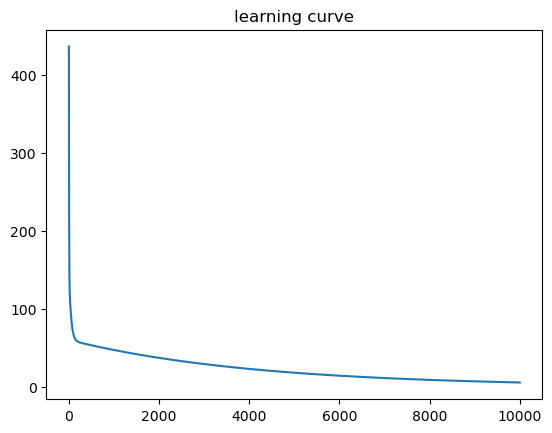

In [7]:
w,b = gradient_descent(X_train, y_train, n_iters = 10000,alpha = 0.001)
print(w, b)